## Assosiation rule mining
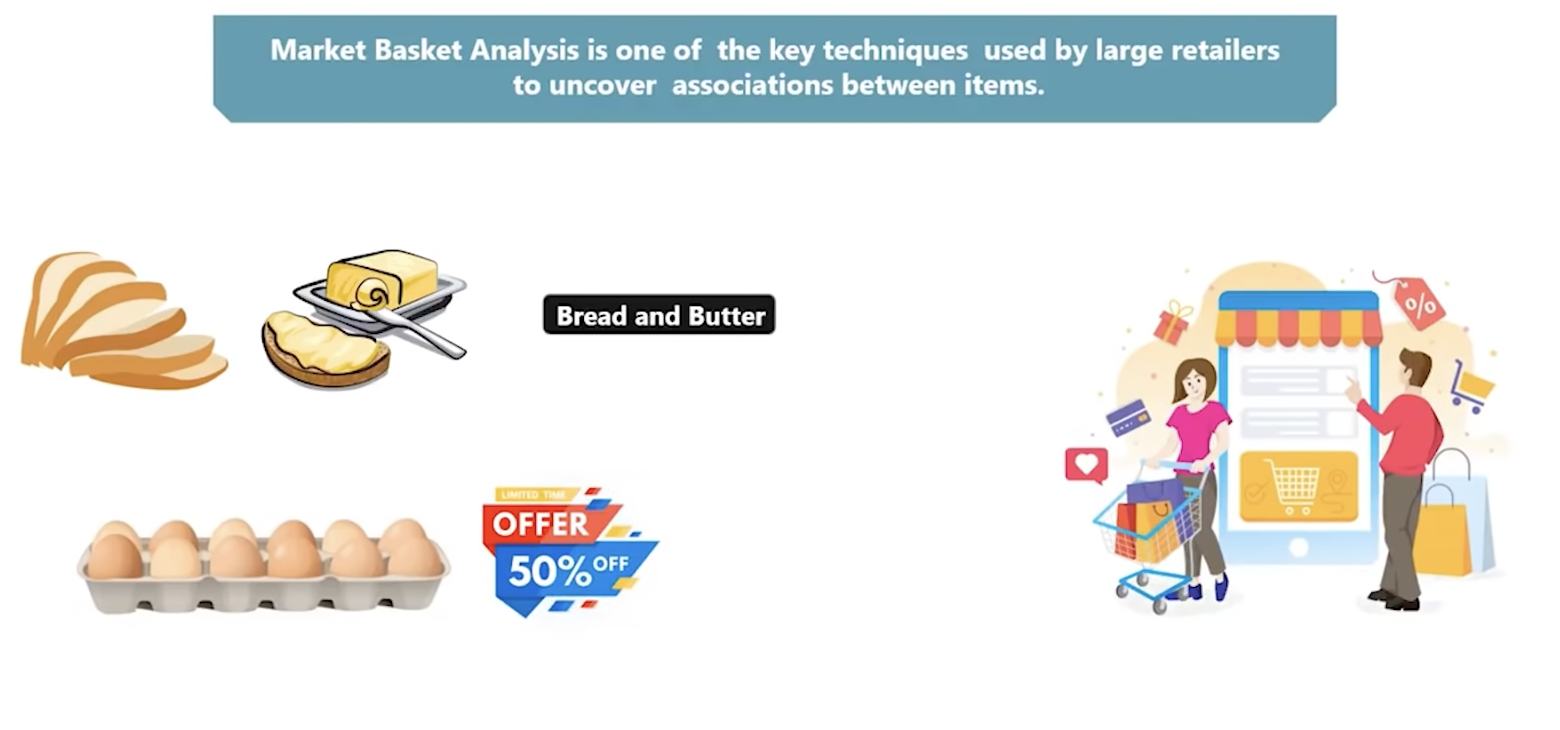
### A => B
<pre>
Support = freq(A,B)/N

Confidence = freq(A,B)/freq(A)

Lift = support / (support(A) * support(B))

Example: Transaction 
 T1: A,B,C
 T2: A,C,D
 T3: B,C,D
 T4: A,D,E
 T5: B,C,E

Rule:
 A => D
 C => A
 A => C
 B & C => A
 
Rule   Support  Confidence    Lift  
A=>D    2/5        2/3        10/9
C=>A    2/5        2/4         5/6
A=>C    2/5        2/3         5/6
B,C=>A  1/5        1/3         5/9
</pre>

## Aprori
Apriori algorithm uses frequent item sets to generate association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset.<br>
Frequent Itemset is an itemset whose support value is greater than a threshold value.
<pre>
Transaction 
 T1: 1,3,4
 T2: 2,3,5
 T3: 1,2,3,5
 T4: 2,5
 T5: 1,3,5
 
 <b>Apriori Algo 1st iter</b> C1
 Itemset   Support
   {1}       3
   {2}       3
   {3}       4
   {4}       1
   {5}       4 
   
 Min support val is 2
 
 Itemset   Support
   {1}       3
   {2}       3
   {3}       4
   {5}       4   
   
 <b>Apriori Algo 2nd iter</b> C2
 Itemset   Support
   {1,2}       1
   {1,3}       3
   {1,5}       2       
   {2,3}       2
   {2,5}       3 
   {3,5}       3 
   
   Min support val is 2 
   
   Itemset   Support
   {1,3}       3
   {1,5}       2           
   {2,3}       2
   {2,5}       3 
   {3,5}       3 
   
   <b>Apriori Algo -pruningr</b> C2 with {1,2}
   
   {1,2,3}, <b>{1,2}</b>, {1,3}, {2,3}  - pruned
   {1,2,5}, <b>{1,2}</b>, {1,5}, {2,5}  - pruned
   {1,3,5},{1,5}, {1,3}, (3,5}
   {2,3,5}, (2,3}, (2,5}, {3,5}
   
 <b>Apriori Algo 3nd iter</b> C3
 Itemset   Support
 {1,3,5}       2       
 {2,3,5}       2
 
 <b>Apriori Algo 4nd iter</b> C4
 Itemset   Support
 {1,2,3,5}   1    
 
 Min support val is 2  so stop here and return
 
 ----------------
 Itemset   Support
 {1,3,5}       2       
 {2,3,5}       2
 
 for  {1,3,5}  subset are {1,3}, {1,5}, {3,5}, {1}, {3}, {5}
 for  {2,3,5}  subset are {2,3}, {2,5}, {3,5}, {2}, {3}, {5}
   
</pre>
for every subset S of I, output the rule<br>
S->(I-S) S recomnds I-S<br>
if support(I)/support(S) >= min_confidance value<br>
Apply this to <br>
     
1. {1,3,5}
     
Rule 1: {1,3) -> ({1,3,5} - {1,3}) means 1 & 3 -> 5
Confidence = support(1,3,5)/support(1,3) = 2/3 = 66.66% > 60%
Rule 1 is selected

Rule 2: {1,5} -> ({1,3,5} - {1,5}) means 1 & 5 -> 3
Confidence = support(1,3,5)/support(1,5) = 2/2 = 100% > 60%
Rule 2 is selected

Rule 3: {3,5} -> ({1,3,5} - {3,5}) means 3 & 5 -> 1
Confidence = support (1,3,5)/support(3,5) = 2/3 = 66.66% > 60%
Rule 3 is selected 

Rule 4: {1} -> ({1,3,5} - {1}) means 1 -> 3 & 5
Confidence = support (1,3,5)/support(1) = 2/3 = 66.66% > 60%
Rule 4 is selected

Rule 5: {3} -> ({1,3,5} - {3}) means 3 -> 1 & 5
Confidence = support(1,3,5)/support(3) = 2/4 = 50% <60%
Rule 5 is rejected

Rule 6: {5) -> (£1,3,5) - (5}) means 5 -> 1 & 3
Confidence = support(1,3,5)/support(3) = 2/4 = 50% < 60%
Rule 6 is rejected
</pre>

In [1]:
import pandas as pd 
df = pd.read_excel ("./Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0,subset=['InvoiceNo'],inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
basket = (df[df['Country'] =="France"].groupby (['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
basket.columns

Index(['10 COLOUR SPACEBOY PEN', '12 COLOURED PARTY BALLOONS',
       '12 EGG HOUSE PAINTED WOOD', '12 MESSAGE CARDS WITH ENVELOPES',
       '12 PENCIL SMALL TUBE WOODLAND', '12 PENCILS SMALL TUBE RED RETROSPOT',
       '12 PENCILS SMALL TUBE SKULL', '12 PENCILS TALL TUBE POSY',
       '12 PENCILS TALL TUBE RED RETROSPOT', '12 PENCILS TALL TUBE WOODLAND',
       ...
       'WRAP VINTAGE PETALS  DESIGN', 'YELLOW COAT RACK PARIS FASHION',
       'YELLOW GIANT GARDEN THERMOMETER', 'YELLOW SHARK HELICOPTER',
       'ZINC  STAR T-LIGHT HOLDER', 'ZINC FOLKART SLEIGH BELLS',
       'ZINC HERB GARDEN CONTAINER', 'ZINC METAL HEART DECORATION',
       'ZINC T-LIGHT HOLDER STAR LARGE', 'ZINC T-LIGHT HOLDER STARS SMALL'],
      dtype='object', name='Description', length=1563)

In [5]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE',inplace=True, axis=1)
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

/Users/amitabhpriyadarshi/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
6,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190
7,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273
8,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.168367,0.137755,0.089286,0.530303,3.849607,0.066092,1.835747
9,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.137755,0.168367,0.089286,0.648148,3.849607,0.066092,2.363588


In [7]:
rules[(rules['lift']>=6) & (rules['confidence']>=0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
21,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850
22,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
